# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

# Creating subset of cities in count of 50
n = 50
def divide_cities(cities, n):
    for i in range(0, len(cities), n):
        yield cities[i:i + n]
cities = list(divide_cities(cities, n))

599


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# list for response results
citynames = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

print("Begining Data Retrieval")
print("------------------------------")
    
# loop through cities, make API request, and append desired results
for idx1, city_list in enumerate(cities, start = 1):
    for idx2, city in enumerate(city_list):
        try:
            response = requests.get(query_url + city).json()
            print(f"Processing Record {idx2} of set {idx1} | {city}")
            citynames.append(response['name'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            windspeed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
        except KeyError:
            print("City not found. Skipping...")
    
    
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Begining Data Retrieval
------------------------------
Processing Record 0 of set 1 | bluff
Processing Record 1 of set 1 | hobart
Processing Record 2 of set 1 | caravelas
Processing Record 3 of set 1 | broadstairs
Processing Record 4 of set 1 | ushuaia
Processing Record 5 of set 1 | binzhou
Processing Record 6 of set 1 | hermanus
Processing Record 7 of set 1 | nikolskoye
Processing Record 8 of set 1 | louisbourg
City not found. Skipping...
Processing Record 9 of set 1 | saint-philippe
Processing Record 10 of set 1 | do gonbadan
Processing Record 11 of set 1 | corcoran
Processing Record 12 of set 1 | raudeberg
Processing Record 13 of set 1 | pevek
Processing Record 14 of set 1 | geraldton
Processing Record 15 of set 1 | rikitea
Processing Record 16 of set 1 | port lincoln
Processing Record 17 of set 1 | new norfolk
Processing Record 18 of set 1 | busselton
Processing Record 19 of set 1 | bethel
Processing Record 20 of set 1 | bani walid
Processing Record 21 of set 1 | esperance
Processi

Processing Record 35 of set 4 | tsiroanomandidy
Processing Record 36 of set 4 | goundi
Processing Record 37 of set 4 | souillac
Processing Record 38 of set 4 | marzuq
Processing Record 39 of set 4 | kodiak
Processing Record 40 of set 4 | lavrentiya
Processing Record 41 of set 4 | storsteinnes
Processing Record 42 of set 4 | yanan
City not found. Skipping...
Processing Record 43 of set 4 | chapais
Processing Record 44 of set 4 | chilca
Processing Record 45 of set 4 | chara
Processing Record 46 of set 4 | maputo
Processing Record 47 of set 4 | palana
Processing Record 48 of set 4 | khatanga
Processing Record 49 of set 4 | jawhar
Processing Record 0 of set 5 | estelle
Processing Record 1 of set 5 | okha
Processing Record 2 of set 5 | kieta
Processing Record 3 of set 5 | gawan
Processing Record 4 of set 5 | qaqortoq
Processing Record 5 of set 5 | bang saphan
Processing Record 6 of set 5 | mahebourg
Processing Record 7 of set 5 | port blair
Processing Record 8 of set 5 | tando adam
Processi

Processing Record 27 of set 8 | luderitz
Processing Record 28 of set 8 | loudi
Processing Record 29 of set 8 | camocim
Processing Record 30 of set 8 | ouahigouya
Processing Record 31 of set 8 | sambava
Processing Record 32 of set 8 | tura
Processing Record 33 of set 8 | hobyo
Processing Record 34 of set 8 | asau
Processing Record 35 of set 8 | teguldet
Processing Record 36 of set 8 | sokna
Processing Record 37 of set 8 | alghero
Processing Record 38 of set 8 | bababe
City not found. Skipping...
Processing Record 39 of set 8 | beloha
Processing Record 40 of set 8 | kandla
Processing Record 41 of set 8 | ryotsu
Processing Record 42 of set 8 | warrington
Processing Record 43 of set 8 | homer
Processing Record 44 of set 8 | cambrils
Processing Record 45 of set 8 | charleston
Processing Record 46 of set 8 | umzimvubu
City not found. Skipping...
Processing Record 47 of set 8 | fonte boa
Processing Record 48 of set 8 | ayios matthaios
City not found. Skipping...
Processing Record 49 of set 8 

Processing Record 14 of set 12 | sahy
Processing Record 15 of set 12 | trairi
Processing Record 16 of set 12 | okhotsk
Processing Record 17 of set 12 | chagoda
Processing Record 18 of set 12 | burnie
Processing Record 19 of set 12 | conceicao da barra
Processing Record 20 of set 12 | dakar
Processing Record 21 of set 12 | hammerfest
Processing Record 22 of set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 23 of set 12 | tubuala
Processing Record 24 of set 12 | mitu
Processing Record 25 of set 12 | nantucket
Processing Record 26 of set 12 | walvis bay
Processing Record 27 of set 12 | kiama
Processing Record 28 of set 12 | stanger
Processing Record 29 of set 12 | dzilam gonzalez
Processing Record 30 of set 12 | honiara
Processing Record 31 of set 12 | canico
Processing Record 32 of set 12 | wanning
Processing Record 33 of set 12 | chaa-khol
City not found. Skipping...
Processing Record 34 of set 12 | luwuk
Processing Record 35 of set 12 | bereda
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:

# build a dataframe from the cities, lon,and pressure lists

weather_data = {"City": citynames
                ,"Lat": lat
                ,"Lon": lon
                ,"Temperature": temp
                ,"Humidity": humidity
                ,"Cloudiness": cloudiness
                ,"Windspeed": windspeed
                ,"Country": country
                ,"Date": date
               }
weather_data = pd.DataFrame(weather_data)
weather_data.head()

,City,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,Bluff,-46.60,168.33,50.00,86,84,8.99,NZ,1603151897
1,Hobart,-42.88,147.33,59.95,58,20,4.70,AU,1603151856
2,Caravelas,-17.71,-39.25,73.54,79,100,5.37,BR,1603152142
3,Broadstairs,51.36,1.44,52.84,66,100,8.01,GB,1603152258
4,Ushuaia,-54.80,-68.30,41.00,80,75,34.45,AR,1603151860


In [15]:
weather_data.describe()

,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.693689,21.727830,59.715190,73.963834,52.341772,7.720651,1.603152e+09
std,34.051632,91.142396,19.983531,19.841367,38.880913,5.530696,1.429380e+02
min,-54.800000,-175.200000,9.370000,9.000000,0.000000,0.090000,1.603152e+09
25%,-9.110000,-58.800000,42.800000,65.000000,10.000000,3.440000,1.603152e+09
50%,24.550000,26.670000,64.450000,78.000000,61.000000,6.600000,1.603152e+09
75%,49.980000,105.020000,76.730000,89.000000,90.000000,10.800000,1.603152e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,34.450000,1.603152e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
clean_weather_data = weather_data[weather_data["Humidity"]<=100.00]
clean_weather_data.describe()

,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.693689,21.727830,59.715190,73.963834,52.341772,7.720651,1.603152e+09
std,34.051632,91.142396,19.983531,19.841367,38.880913,5.530696,1.429380e+02
min,-54.800000,-175.200000,9.370000,9.000000,0.000000,0.090000,1.603152e+09
25%,-9.110000,-58.800000,42.800000,65.000000,10.000000,3.440000,1.603152e+09
50%,24.550000,26.670000,64.450000,78.000000,61.000000,6.600000,1.603152e+09
75%,49.980000,105.020000,76.730000,89.000000,90.000000,10.800000,1.603152e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,34.450000,1.603152e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
clean_weather_data.head()

,City,Lat,Lon,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,Bluff,-46.60,168.33,50.00,86,84,8.99,NZ,1603151897
1,Hobart,-42.88,147.33,59.95,58,20,4.70,AU,1603151856
2,Caravelas,-17.71,-39.25,73.54,79,100,5.37,BR,1603152142
3,Broadstairs,51.36,1.44,52.84,66,100,8.01,GB,1603152258
4,Ushuaia,-54.80,-68.30,41.00,80,75,34.45,AR,1603151860


In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_data.index.names = ["City_ID"]
clean_weather_data.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

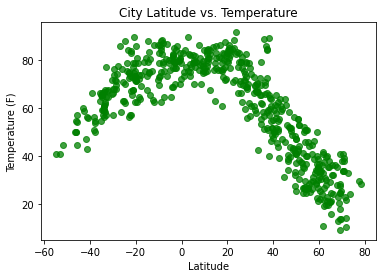

In [19]:

plt.scatter(lat, temp, marker="o", facecolors="green"
            , alpha=0.75)

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()


## Latitude vs. Humidity Plot

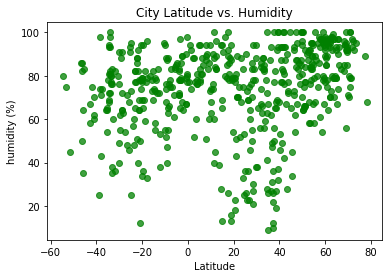

In [20]:
plt.scatter(lat, humidity, marker="o", facecolors="green"
            , alpha=0.75)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("humidity (%)")
plt.show()


## Latitude vs. Cloudiness Plot

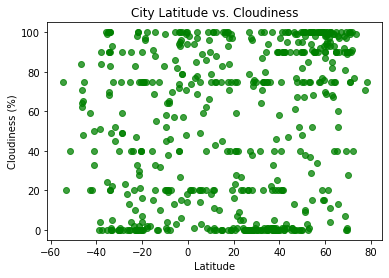

In [21]:
plt.scatter(lat, cloudiness , marker="o", facecolors="green"
            , alpha=0.75)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()


## Latitude vs. Wind Speed Plot

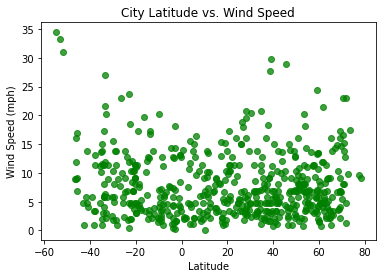

In [22]:
plt.scatter(lat, windspeed, marker="o", facecolors="green"
            , alpha=0.75)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()


## Linear Regression

In [23]:
weather_data_n = clean_weather_data[clean_weather_data["Lat"]>=0.00]
weather_data_s = clean_weather_data[clean_weather_data["Lat"]<0.00]
print(weather_data_n.count())
print(weather_data_s.count())

City           371
Lat            371
Lon            371
Temperature    371
Humidity       371
Cloudiness     371
Windspeed      371
Country        371
Date           371
dtype: int64
City           182
Lat            182
Lon            182
Temperature    182
Humidity       182
Cloudiness     182
Windspeed      182
Country        182
Date           182
dtype: int64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

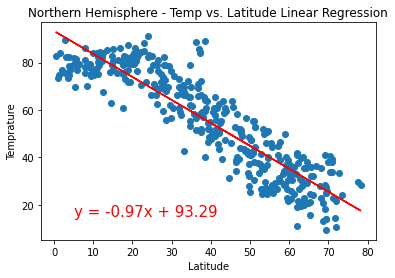

In [24]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

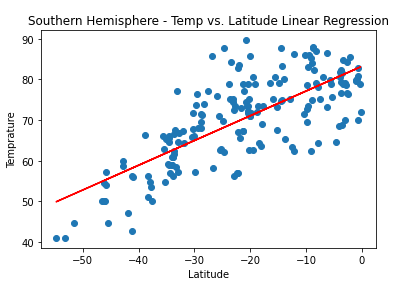

In [25]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.title("Southern Hemisphere - Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

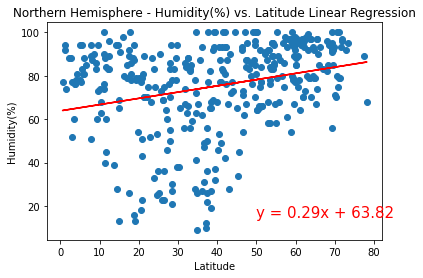

In [26]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

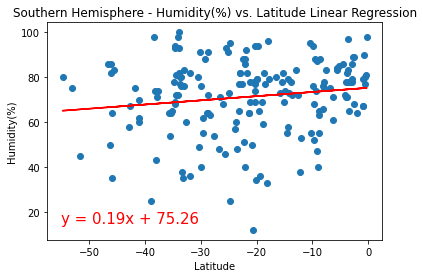

In [27]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

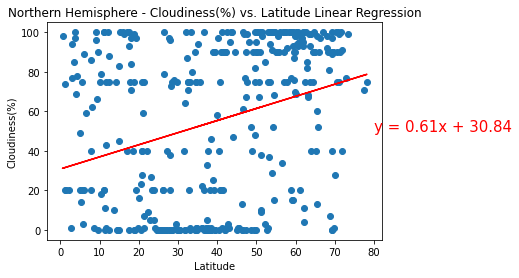

In [28]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(80,50),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

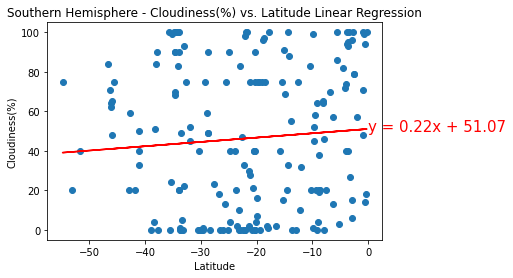

In [29]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

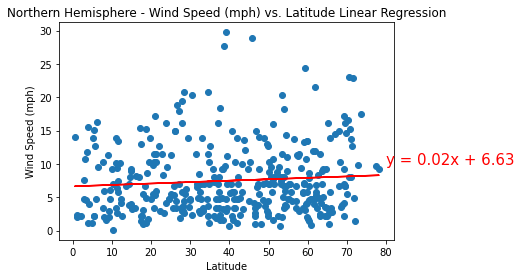

In [30]:
x_axis = weather_data_n["Lat"]
y_axis = weather_data_n["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(80,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

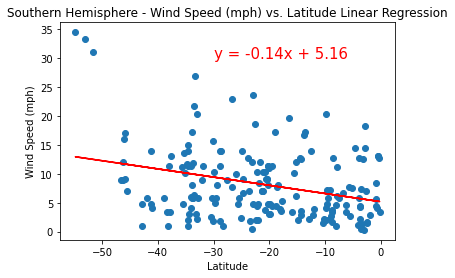

In [31]:
x_axis = weather_data_s["Lat"]
y_axis = weather_data_s["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()